In [1]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from __future__ import division

In [2]:
# Display plots in Jupyter Notebook
%matplotlib inline

# Increase maximum rows and columns to 999 (instead of the default 60)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
shr = pd.read_csv('/Users/adibronshtein/Documents/Datasets/Capstone/SHR1976_2015.csv')

/Users/adibronshtein/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
shr.head()

ID       CNTYFIPS      Ori    State          Agency  \
0  197601001AKASP00     Juneau, AK  AKASP00   Alaska  State Troopers   
1  197601001AL00102  Jefferson, AL  AL00102  Alabama      Birmingham   
2  197601001AL00104  Jefferson, AL  AL00104  Alabama       Fairfield   
3  197601001AL00106  Jefferson, AL  AL00106  Alabama           Leeds   
4  197601001AL00201     Mobile, AL  AL00201  Alabama          Mobile   

           Agentype Source Solved  Year StateName    Month  Incident  \
0  Primary state LE    FBI    Yes  1976    ALASKA  January         1   
1  Municipal police    FBI    Yes  1976       ALA  January         1   
2  Municipal police    FBI    Yes  1976       ALA  January         1   
3  Municipal police    FBI    Yes  1976       ALA  January         1   
4  Municipal police    FBI    Yes  1976       ALA  January         1   

      ActionType                               Homicide  \
0  Normal update  Murder and non-negligent manslaughter   
1  Normal update  Murder and non-negligent manslaughter   
2  Normal update  Murder and non-negligent manslaughter   
3  Normal update  Murder and non-negligent manslaughter   
4     Adjustment  Murder and non-negligent manslaughter   

                       Situation VicAge  VicSex  \
0  Single victim/single offender     48    Male   
1  Single victim/single offender     65    Male   
2  Single victim/single offender     45  Female   
3  Single victim/single offender     43    Male   
4  Single victim/single offender     35    Male   

                             VicRace                VicEthnic OffAge  OffSex  \
0  American Indian or Alaskan Native  Unknown or not reported     55  Female   
1                              Black  Unknown or not reported     67    Male   
2                              Black  Unknown or not reported     53    Male   
3                              Black  Unknown or not reported     35  Female   
4                              White  Unknown or not reported     25  Female   

                             OffRace                OffEthnic  \
0  American Indian or Alaskan Native  Unknown or not reported   
1                              Black  Unknown or not reported   
2                              Black  Unknown or not reported   
3                              Black  Unknown or not reported   
4                              White  Unknown or not reported   

                        Weapon  Relationship                     Circumstance  \
0  Knife or cutting instrument       Husband                  Other arguments   
1                      Shotgun  Acquaintance  Felon killed by private citizen   
2                      Shotgun          Wife                            Other   
3  Knife or cutting instrument       Brother                  Other arguments   
4      Strangulation - hanging  Acquaintance       Circumstances undetermined   

                               Subcircum  VicCount  OffCount  FileDate  \
0                                    NaN         0         0     30180   
1  Felon killed in commission of a crime         0         0     30180   
2                                    NaN         0         0     30180   
3                                    NaN         0         0     30180   
4                                    NaN         0         0     30180   

    fstate                    MSA StateName2  
0   Alaska           Rural Alaska     ALASKA  
1  Alabama  Birmingham-Hoover, AL        ALA  
2  Alabama  Birmingham-Hoover, AL        ALA  
3  Alabama  Birmingham-Hoover, AL        ALA  
4  Alabama             Mobile, AL        ALA

In [5]:
shr.drop_duplicates(inplace=True)

In [6]:
shr.duplicated().sum()

0

In [7]:
# 999/'999' stand for missing values. I'm changing those to NaN
shr.VicAge.replace('999',np.nan, inplace=True)
shr.VicAge.replace(999, np.nan, inplace=True)
shr.VicAge.replace('99 years old or more', 99, inplace=True)

In [8]:
shr.VicAge = shr.VicAge.astype(float)


In [9]:
# Finally, floats :) 
shr.VicAge.dtype

dtype('float64')

In [10]:
# Same for offenders:
shr.OffAge.replace([999,'999'], np.nan, inplace=True)
shr.OffAge.replace('99 years old or more', 100, inplace=True)
shr.OffAge.replace('1 year old', 1, inplace=True)


In [11]:
shr['OffAge'] = pd.to_numeric(shr['OffAge'], errors = 'coerce')

In [12]:
shr['OffAge'].dtypes

dtype('float64')

In [13]:
shr.columns

Index([u'ID', u'CNTYFIPS', u'Ori', u'State', u'Agency', u'Agentype', u'Source',
       u'Solved', u'Year', u'StateName', u'Month', u'Incident', u'ActionType',
       u'Homicide', u'Situation', u'VicAge', u'VicSex', u'VicRace',
       u'VicEthnic', u'OffAge', u'OffSex', u'OffRace', u'OffEthnic', u'Weapon',
       u'Relationship', u'Circumstance', u'Subcircum', u'VicCount',
       u'OffCount', u'FileDate', u'fstate', u'MSA', u'StateName2'],
      dtype='object')

In [14]:
# My target variable is whether a murder was solved or not. 
y = [1 if x == 'Yes' else 0 for x in shr.Solved]

In [15]:
shr['target'] = y

In [16]:
shr['target'].value_counts()

1    516988
0    213244
Name: target, dtype: int64

In [17]:
shr.corr()

Year  Incident    VicAge    OffAge  VicCount  OffCount  \
Year      1.000000  0.130180 -0.017414  0.006846  0.029992  0.062458   
Incident  0.130180  1.000000  0.003302  0.007667 -0.007422 -0.005710   
VicAge   -0.017414  0.003302  1.000000  0.376227 -0.022630 -0.028170   
OffAge    0.006846  0.007667  0.376227  1.000000  0.005486 -0.178269   
VicCount  0.029992 -0.007422 -0.022630  0.005486  1.000000  0.057484   
OffCount  0.062458 -0.005710 -0.028170 -0.178269  0.057484  1.000000   
FileDate  0.024893 -0.102810 -0.009666 -0.011488  0.001150 -0.022862   
target   -0.043978 -0.022589 -0.005370 -0.014936  0.022964  0.162111   

          FileDate    target  
Year      0.024893 -0.043978  
Incident -0.102810 -0.022589  
VicAge   -0.009666 -0.005370  
OffAge   -0.011488 -0.014936  
VicCount  0.001150  0.022964  
OffCount -0.022862  0.162111  
FileDate  1.000000 -0.009997  
target   -0.009997  1.000000

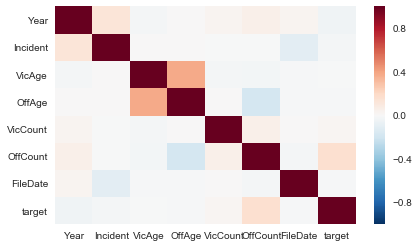

In [18]:
sns.heatmap(shr.corr())

In [19]:
shr.keys()

Index([u'ID', u'CNTYFIPS', u'Ori', u'State', u'Agency', u'Agentype', u'Source',
       u'Solved', u'Year', u'StateName', u'Month', u'Incident', u'ActionType',
       u'Homicide', u'Situation', u'VicAge', u'VicSex', u'VicRace',
       u'VicEthnic', u'OffAge', u'OffSex', u'OffRace', u'OffEthnic', u'Weapon',
       u'Relationship', u'Circumstance', u'Subcircum', u'VicCount',
       u'OffCount', u'FileDate', u'fstate', u'MSA', u'StateName2', u'target'],
      dtype='object')

## Feature Engineering 

Clustering relationship into groups:

In [20]:
def encodeIntimateRelationship(x): return 1 if x in ('Boyfriend', 'Boyfriend/Girlfriend', 'Girlfriend', 'Wife', 'Husband') else 0
def encodeFamilyRelationship(x): return 1 if x in ('Son', 'Family', 'Daughter', 'Brother', 'Father', 'Mother', 'Sister') else 0
def encodeWorkRelationship(x): return 1 if x in ('Employer', 'Employee') else 0

In [21]:
shr['enc_IntimateRelationship'] = shr.Relationship.apply(encodeIntimateRelationship)
shr['enc_FamilyRelationship'] = shr.Relationship.apply(encodeFamilyRelationship)
shr['enc_WorkRelationship'] = shr.Relationship.apply(encodeWorkRelationship)

In [22]:
shr['enc_IntimateRelationship'].value_counts()

0    664503
1     65729
Name: enc_IntimateRelationship, dtype: int64

In [23]:
shr['enc_FamilyRelationship'].value_counts()

0    692407
1     37825
Name: enc_FamilyRelationship, dtype: int64

In [24]:
shr['enc_WorkRelationship'].value_counts()

0    729234
1       998
Name: enc_WorkRelationship, dtype: int64

In [25]:
off_dummies = pd.get_dummies(shr['OffRace'])

In [26]:
vic_dummies = pd.get_dummies(shr['VicRace'])

In [27]:
def encodeGender(x): return 1 if x == 'Female' else 0 

In [28]:
shr['VicSexDummy'] = shr.VicSex.apply(encodeGender)

In [29]:
shr.VicSexDummy.value_counts()

0    565796
1    164436
Name: VicSexDummy, dtype: int64

## Logistic Regression 

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/Users/adibronshtein/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
shr.dropna(inplace=True)

In [32]:
shr.columns

Index([u'ID', u'CNTYFIPS', u'Ori', u'State', u'Agency', u'Agentype', u'Source',
       u'Solved', u'Year', u'StateName', u'Month', u'Incident', u'ActionType',
       u'Homicide', u'Situation', u'VicAge', u'VicSex', u'VicRace',
       u'VicEthnic', u'OffAge', u'OffSex', u'OffRace', u'OffEthnic', u'Weapon',
       u'Relationship', u'Circumstance', u'Subcircum', u'VicCount',
       u'OffCount', u'FileDate', u'fstate', u'MSA', u'StateName2', u'target',
       u'enc_IntimateRelationship', u'enc_FamilyRelationship',
       u'enc_WorkRelationship', u'VicSexDummy'],
      dtype='object')

In [39]:
y = LabelEncoder().fit_transform(shr['Solved'])
X = pd.get_dummies(shr[['VicSex','VicRace','OffAge','OffRace', 'enc_IntimateRelationship', 'enc_FamilyRelationship', 'enc_WorkRelationship']])

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)


In [42]:
rt = RandomForestClassifier(n_jobs=-1)
rt.fit(X_train, Y_train)
Y_pred = rt.predict(X_test)
print rt.score(X_test, Y_test)
s = cross_val_score(rt, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))

0.999800637959


/Users/adibronshtein/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Random Forest Score:	0.999 ± 0.001


In [46]:
rt.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [51]:
rt.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_split',
 'random_state')

In [53]:
rt.decision_path

<bound method RandomForestClassifier.decision_path of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

In [44]:
rt.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=141420683, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=701056263, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1289225897, splitter='best'),
 DecisionTreeClassifier(

In [45]:
from sklearn.ensemble import AdaBoostClassifier
